In [132]:
import pandas as pd
from SmilesPE.pretokenizer import atomwise_tokenizer
from collections import Counter
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [21]:
df = pd.read_pickle('data/uspto50/uspto_50.pickle')
df.head()

,reactants_mol,products_mol,reaction_type,set
0,<rdkit.Chem.rdchem.Mol object at 0x7fe891a81030>,<rdkit.Chem.rdchem.Mol object at 0x7fe887f1a110>,<RX_1>,train
1,<rdkit.Chem.rdchem.Mol object at 0x7fe891a810d0>,<rdkit.Chem.rdchem.Mol object at 0x7fe887f1a160>,<RX_6>,train
2,<rdkit.Chem.rdchem.Mol object at 0x7fe891a81170>,<rdkit.Chem.rdchem.Mol object at 0x7fe887f1a1b0>,<RX_9>,train
3,<rdkit.Chem.rdchem.Mol object at 0x7fe891a81210>,<rdkit.Chem.rdchem.Mol object at 0x7fe887f1a200>,<RX_6>,train
4,<rdkit.Chem.rdchem.Mol object at 0x7fe891a812b0>,<rdkit.Chem.rdchem.Mol object at 0x7fe887f1a250>,<RX_1>,train


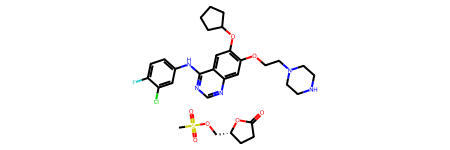

In [22]:
df['reactants_mol'][0]

In [27]:
df['reactant_atoms'] = df.apply(lambda x: Counter([atom.GetSymbol() for atom in x['reactants_mol'].GetAtoms()]), axis=1)
df['product_atoms']  = df.apply(lambda x: Counter([atom.GetSymbol() for atom in x['products_mol'].GetAtoms()]), axis=1)

In [29]:
df['reactant_atoms'][0], df['product_atoms'][0]

(Counter({'C': 31, 'O': 7, 'N': 5, 'S': 1, 'F': 1, 'Cl': 1}),
 Counter({'C': 30, 'N': 5, 'O': 4, 'F': 1, 'Cl': 1}))

In [31]:
df['reactant_atoms'][0] - df['product_atoms'][0], df['product_atoms'][0] - df['reactant_atoms'][0]

(Counter({'O': 3, 'C': 1, 'S': 1}), Counter())

In [33]:
len(df['reactant_atoms'][0] - df['product_atoms'][0]), len(df['product_atoms'][0] - df['reactant_atoms'][0])

(3, 0)

In [34]:
df['reactant_surplus'] = df.apply(lambda x: x['reactant_atoms'] - x['product_atoms'], axis=1)
df['product_surplus']  = df.apply(lambda x: x['product_atoms'] - x['reactant_atoms'], axis=1)

reactant_surplus_count
1    34496
2     6839
3     3748
0     3470
4     1326
5      154
6        4
Name: count, dtype: int64


<Axes: >

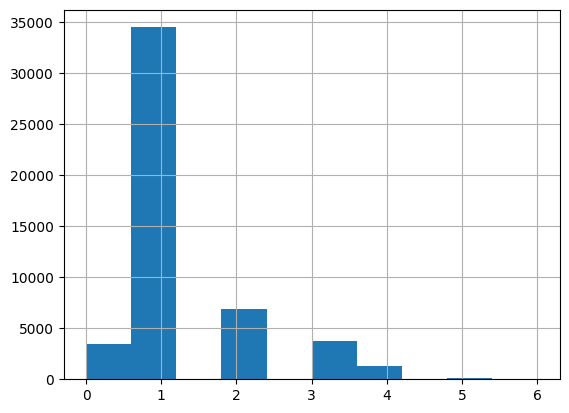

In [47]:
df['reactant_surplus_count'] = df.apply(lambda x: len(x['reactant_surplus']), axis=1)
print(df['reactant_surplus_count'].value_counts())
df['reactant_surplus_count'].hist()

product_surplus_count
0    49786
1      234
2       13
3        4
Name: count, dtype: int64


<Axes: >

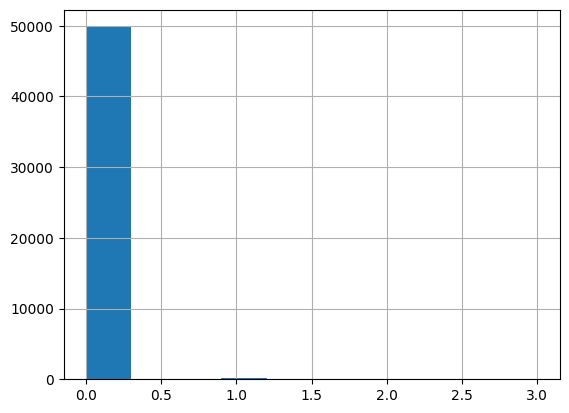

In [48]:
df['product_surplus_count'] = df.apply(lambda x: len(x['product_surplus']), axis=1)
print(df['product_surplus_count'].value_counts())
df['product_surplus_count'].hist()

1    34488
2     6811
3     3660
0     3466
4     1384
5      207
6       20
7        1
Name: count, dtype: int64


<Axes: >

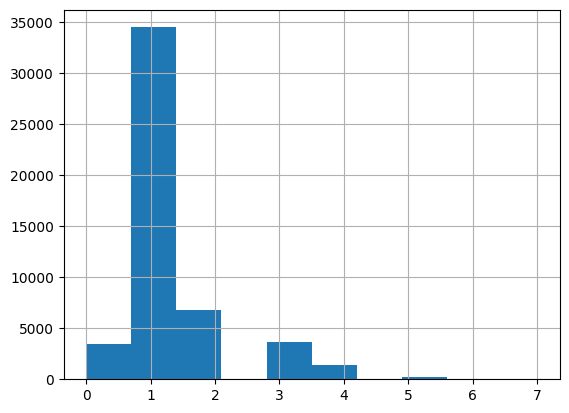

In [50]:
print(df.apply(lambda x: len(x['reactant_surplus']) + len(x['product_surplus']), axis=1).value_counts())
df.apply(lambda x: len(x['reactant_surplus']) + len(x['product_surplus']), axis=1).hist()

{'C': 10, 'N': 1, 'F': 1, 'Cl': 1, 'O': 1, 'Br': 1}


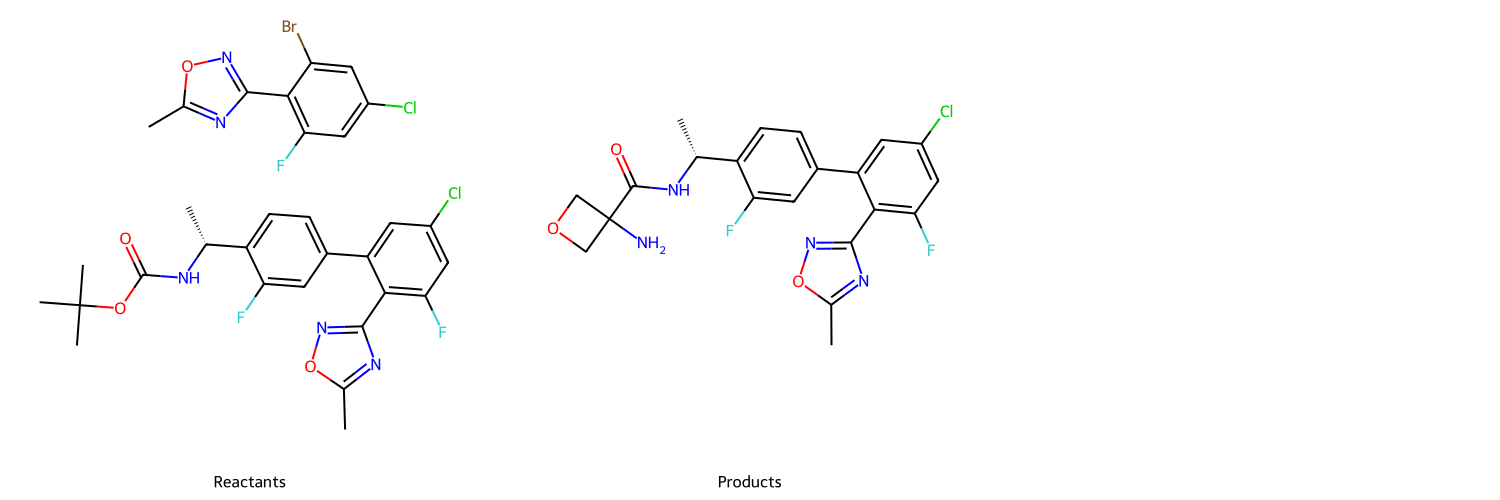

In [148]:
surplus_val = 6
print(dict(df[df['reactant_surplus_count'] == surplus_val]['reactant_surplus'].iloc[0]))
Draw.MolsToGridImage((
    df[df['reactant_surplus_count'] == surplus_val]['reactants_mol'].iloc[0], 
    df[df['reactant_surplus_count'] == surplus_val]['products_mol'].iloc[0]), 
    subImgSize=(500, 500),
    legends=['Reactants', 'Products'])